In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(42)

#Read in datafile
mass_shooting_22 = pd.read_csv('gva_mass_shooting_2022.csv')

In [2]:
#Viewing df
mass_shooting_22.sample(20)

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
415,2318046,31-May-22,Texas,Waco,1900 block of Preston St,0,4,NaN
532,2268762,2-Apr-22,Louisiana,Monroe,100 Sterlington Rd,1,5,NaN
463,2299176,10-May-22,Texas,Brookshire,Purdy and 4th St,1,3,NaN
98,2450590,21-Oct-22,Mississippi,Cleveland,511 Lee St,1,3,NaN
190,2406656,4-Sep-22,Florida,Fort Lauderdale (Lauderdale Lakes),3050 NW 41st St,0,4,NaN
121,2434326,9-Oct-22,Arkansas,Jacksonville,300 Marshall Rd,1,3,NaN
110,2438494,15-Oct-22,New York,Freeport,Babylon Tpke and Independence Ave,0,4,NaN
49,2462457,18-Nov-22,Virginia,Richmond,4275 Laurel Oak Rd,4,0,NaN
87,2445686,25-Oct-22,Ohio,Hamilton,700 block of S 2nd St,2,2,NaN
360,2340696,26-Jun-22,Texas,Winona,18005 FM 2767,0,5,NaN


In [3]:
#Viewing df
mass_shooting_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Incident ID     648 non-null    int64  
 1   Incident Date   648 non-null    object 
 2   State           648 non-null    object 
 3   City Or County  648 non-null    object 
 4   Address         641 non-null    object 
 5   # Killed        648 non-null    int64  
 6   # Injured       648 non-null    int64  
 7   Operations      0 non-null      float64
dtypes: float64(1), int64(3), object(4)
memory usage: 40.6+ KB


In [4]:
#Getting df shape
mass_shooting_22.shape

(648, 8)

In [5]:
#Viewing datatypes
mass_shooting_22.dtypes

Incident ID         int64
Incident Date      object
State              object
City Or County     object
Address            object
# Killed            int64
# Injured           int64
Operations        float64
dtype: object

In [6]:
#Viewing Null values
mass_shooting_22.isnull().sum()

Incident ID         0
Incident Date       0
State               0
City Or County      0
Address             7
# Killed            0
# Injured           0
Operations        648
dtype: int64

In [7]:
#Viewing descriptive stats
mass_shooting_22.describe()

,Incident ID,# Killed,# Injured,Operations
count,6.480000e+02,648.000000,648.000000,0.0
mean,2.351736e+06,1.043210,4.169753,NaN
std,7.799541e+04,1.588594,2.520190,NaN
min,2.201629e+06,0.000000,0.000000,NaN
25%,2.289553e+06,0.000000,3.000000,NaN
50%,2.354791e+06,1.000000,4.000000,NaN
75%,2.416895e+06,1.000000,5.000000,NaN
max,2.492253e+06,22.000000,29.000000,NaN


### Data Cleaning ###
- Change Incident Date from object to datetime
- Drop columns Address and Operations
- Rename Columns '# Killed', '# Injured'
- Investigate and Resolve Null values

In [8]:
#Create df copy for cleaning
mass_copy = mass_shooting_22.copy()
mass_copy.head()

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,2491656,31-Dec-22,Arizona,Phoenix,4201 N 19th Ave,0,9,NaN
1,2492253,31-Dec-22,Alabama,Mobile,200 block of Dauphin St,1,8,NaN
2,2491054,30-Dec-22,Tennessee,Memphis,E Brooks Rd,1,3,NaN
3,2490925,30-Dec-22,Texas,Humble,4800 block of Park Square Ln,2,3,NaN
4,2489614,28-Dec-22,New York,Bronx,851 E Tremont Ave,1,3,NaN


In [9]:
#Renaming columns
mass_copy.rename(columns={'# Killed': 'Killed', '# Injured': 'Injured'}, inplace=True)
mass_copy.sample(20)

,Incident ID,Incident Date,State,City Or County,Address,Killed,Injured,Operations
449,2303337,15-May-22,Texas,Amarillo,1003 N Fillmore St,1,4,NaN
24,2478061,9-Dec-22,Arizona,Phoenix,S 21st and W Burgess LN,1,3,NaN
117,2434847,10-Oct-22,California,Delano,County Line Road and Road 136,1,3,NaN
206,2399839,28-Aug-22,California,Los Angeles,2471 Whittier Blvd,0,6,NaN
490,2287581,25-Apr-22,Alabama,Birmingham,821 3rd Ave W,1,3,NaN
126,2434151,8-Oct-22,Missouri,Saint Joseph,302 Illinois Ave,0,4,NaN
498,2285242,22-Apr-22,Ohio,Cincinnati,Kemper Ln and E McMillan St,0,4,NaN
211,2398877,27-Aug-22,Kentucky,Lexington,207 Legends Ln,0,7,NaN
222,2393051,20-Aug-22,North Carolina,Asheville,11 Grove St,0,4,NaN
171,2412164,11-Sep-22,New Mexico,Santa Fe,Paseo Feliz,0,5,NaN


In [10]:
#Drop Columns
mass_copy.drop(columns = ['Address', 'Operations'], axis=1, inplace=True)
mass_copy.sample(5)

,Incident ID,Incident Date,State,City Or County,Killed,Injured
338,2349758,4-Jul-22,New York,Corona (Queens),0,4
337,2349545,4-Jul-22,Colorado,Denver,1,3
349,2346406,1-Jul-22,Mississippi,Greenwood,1,7
245,2381321,7-Aug-22,Georgia,Atlanta,2,4
224,2392494,19-Aug-22,Illinois,Chicago,1,4


In [11]:
#Change date from object to datetime
from datetime import datetime
mass_copy['Incident Date'] = pd.to_datetime(mass_copy['Incident Date'])

In [12]:
#Confirming all incidents are unique, no duplicates
mass_copy['Incident ID'].nunique()

648

In [13]:
#Verifying no null values
mass_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Incident ID     648 non-null    int64         
 1   Incident Date   648 non-null    datetime64[ns]
 2   State           648 non-null    object        
 3   City Or County  648 non-null    object        
 4   Killed          648 non-null    int64         
 5   Injured         648 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 30.5+ KB


### Exploratory Data Analysis

-Explore data

<AxesSubplot:>

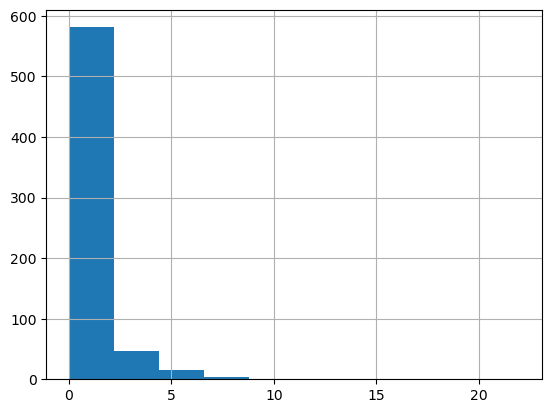

In [14]:
#Viewing data by hist
mass_copy['Killed'].hist()

<AxesSubplot:>

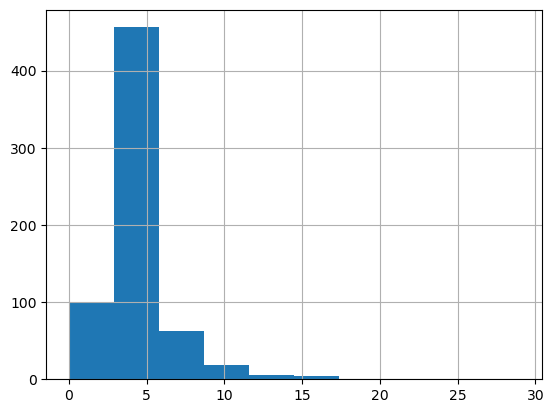

In [15]:
#Viewing data by hist
mass_copy['Injured'].hist()

<AxesSubplot:>

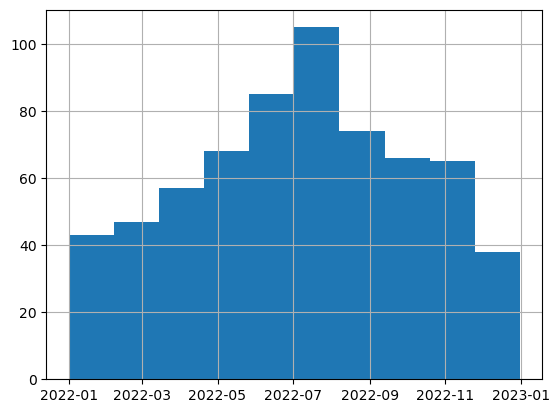

In [16]:
#Viewing MS incidents by hist
mass_copy['Incident Date'].hist()

In [17]:
#Getting month from date
mass_copy['month'] = mass_copy['Incident Date'].dt.month
mass_copy.head(10)

,Incident ID,Incident Date,State,City Or County,Killed,Injured,month
0,2491656,2022-12-31,Arizona,Phoenix,0,9,12
1,2492253,2022-12-31,Alabama,Mobile,1,8,12
2,2491054,2022-12-30,Tennessee,Memphis,1,3,12
3,2490925,2022-12-30,Texas,Humble,2,3,12
4,2489614,2022-12-28,New York,Bronx,1,3,12
5,2490150,2022-12-28,Texas,Dallas,0,6,12
6,2488952,2022-12-27,District of Columbia,Washington,0,4,12
7,2489345,2022-12-27,Ohio,Columbus,0,5,12
8,2489124,2022-12-27,California,Eureka,2,2,12
9,2488209,2022-12-26,Louisiana,New Orleans,2,4,12


In [18]:
#Viewing month counts
mass_copy.month.value_counts()

7     89
9     64
6     64
5     64
10    62
8     62
4     57
11    43
3     42
2     36
1     34
12    31
Name: month, dtype: int64

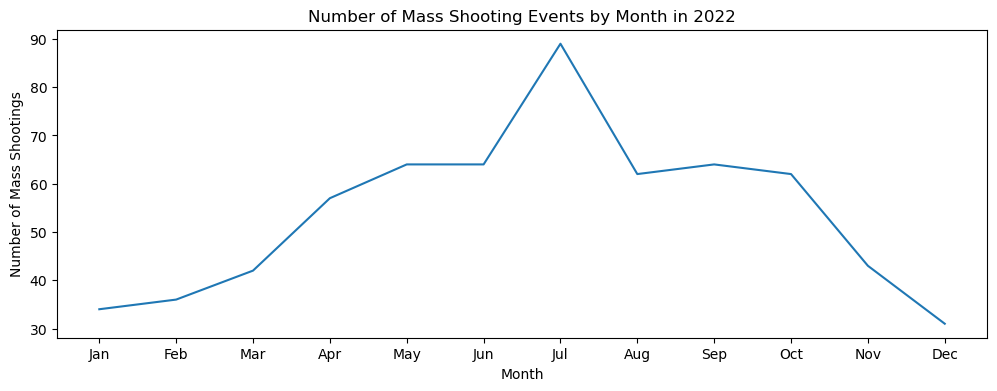

In [19]:
#Plot MSE timeline
fig, axs = plt.subplots(figsize=(12, 4))
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

line = mass_copy.groupby(mass_copy["Incident Date"].dt.month)['month'].value_counts()
line.plot()

plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=labels)
plt.title('Number of Mass Shooting Events by Month in 2022')
plt.xlabel("Month"); 

plt.ylabel("Number of Mass Shootings");

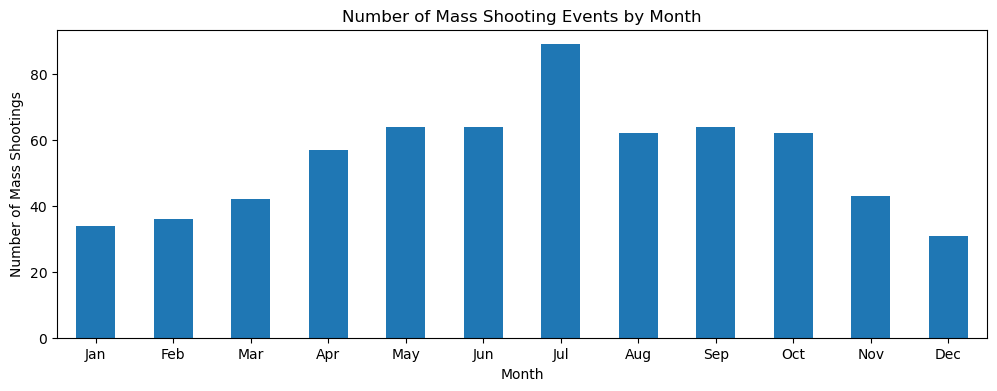

In [20]:
#Bar graph of MSE per month
fig, axs = plt.subplots(figsize=(12, 4))
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

mass_copy.groupby(mass_copy["Incident Date"].dt.month)['month'].value_counts().plot(
    kind='bar', rot=0, ax=axs)

plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=labels)
plt.title('Number of Mass Shooting Events by Month')
plt.xlabel("Month"); 

plt.ylabel("Number of Mass Shootings");

### Add Giffords Law State Grade Levels

- Create dict with state grades
- Add to df

In [21]:
#Create dict to hold state gun law values
#State Gun Law Scorecard obtained from 
grade_dict = {'A' :['California', 'New Jersey', 'Connecticut', 'Hawaii', 'Illinois', 'Maryland', 'Massachusetts', 'New York'],
'B' : ['Colorado', 'Delaware', 'Rhode Island', 'Virginia', 'Washington', 'Oregon', 'Pennsylvania'],
'C': ['Michigan', 'Nevada', 'Minnesota', 'New Mexico', 'Florida', 'Nebraska', 'North Carolina', 'Vermont', 'Wisconsin'],
'D': ['Ohio', 'Indiana'],
'F': ['Alabama', 'Alaska', 'Arkansas', 'Arizona', 'Georgia', 'Idaho', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 
     'Mississippi', 'Missouri', 'Montana', 'New Hampshire', 'North Dakota', 'Oklahoma', 'South Carolina', 'South Dakota', 
     'Tennessee', 'Texas', 'Utah', 'West Virginia', 'Wyoming']}

# all_states = ['California', 'New Jersey', 'Connecticut', 'Hawaii', 'Illinois', 'Maryland', 'Massachusetts', 'New York',
#                 'Colorado', 'Delaware', 'Rhode Island', 'Virginia', 'Washington', 'Oregon', 'Pennsylvania',
#             'Michigan', 'Nevada', 'Minnesota', 'New Mexico', 'Florida', 'Nebraska', 'North Carolina', 'Vermont', 'Wisconsin',
#               'Ohio', 'Indiana','Alabama', 'Alaska', 'Arkansas', 'Arizona', 'Georgia', 'Idaho', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 
#      'Mississippi', 'Missouri', 'Montana', 'New Hampshire', 'North Dakota', 'Oklahoma', 'South Carolina', 'South Dakota', 
#      'Tennessee', 'Texas', 'Utah', 'West Virginia', 'Wyoming']

In [22]:
#Function to add state grade levels from dict to df
def flatten_dict(d):
    nd = {}
    for k,v in d.items():
        # Check if it's a list, if so then iterate through
        if ((hasattr(v, '__iter__') and not isinstance(v, str))):
            for item in v:
                nd[item] = k
        else:
            nd[v] = k
    return nd

d = flatten_dict(grade_dict)

In [23]:
#Adding new column with dict values
mass_copy['Grade'] = mass_copy['State'].map(d)

In [24]:
#Viewing df with new column
mass_copy.sample(10)

,Incident ID,Incident Date,State,City Or County,Killed,Injured,month,Grade
132,2428950,2022-10-02,Tennessee,Nashville,0,4,10,F
486,2289308,2022-04-27,Louisiana,Opelousas,2,3,4,F
307,2361490,2022-07-16,Pennsylvania,Philadelphia,0,4,7,B
75,2450557,2022-10-31,Illinois,East Saint Louis,2,3,10,A
122,2433539,2022-10-09,Florida,Tampa,1,6,10,C
12,2485011,2022-12-19,Florida,Lake City,0,5,12,C
540,2259262,2022-03-21,Connecticut,Waterbury,0,4,3,A
59,2458086,2022-11-11,New Jersey,Jersey City,0,4,11,A
501,2283535,2022-04-20,Minnesota,Duluth,5,0,4,C
378,2333667,2022-06-17,Illinois,Chicago,0,5,6,A


In [25]:
#Rechecking nulls
mass_copy['Grade'].isnull().sum()

9

In [26]:
mass_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Incident ID     648 non-null    int64         
 1   Incident Date   648 non-null    datetime64[ns]
 2   State           648 non-null    object        
 3   City Or County  648 non-null    object        
 4   Killed          648 non-null    int64         
 5   Injured         648 non-null    int64         
 6   month           648 non-null    int64         
 7   Grade           639 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 40.6+ KB


In [27]:
# creating bool series True for NaN values
bool_series = pd.isnull(mass_copy["Grade"])
   
# filtering data
# displaying data only with Gender = NaN
mass_copy[bool_series]

,Incident ID,Incident Date,State,City Or County,Killed,Injured,month,Grade
6,2488952,2022-12-27,District of Columbia,Washington,0,4,12,NaN
130,2431594,2022-10-06,District of Columbia,Washington,1,3,10,NaN
216,2396536,2022-08-24,District of Columbia,Washington,2,3,8,NaN
261,2375886,2022-08-01,District of Columbia,Washington,1,5,8,NaN
302,2361532,2022-07-16,District of Columbia,Washington,1,3,7,NaN
370,2334920,2022-06-19,District of Columbia,Washington,1,3,6,NaN
499,2284819,2022-04-22,District of Columbia,Washington,1,4,4,NaN
523,2274855,2022-04-09,District of Columbia,Washington,0,4,4,NaN
620,2220985,2022-01-27,District of Columbia,Washington,1,4,1,NaN


In [28]:
#Giffords Law does not have a rating for Washington D.C. because it is a district and not a state
#Remove info from D.C null values
mass_copy.dropna(inplace=True)

In [29]:
#Verifying no null values
mass_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 0 to 647
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Incident ID     639 non-null    int64         
 1   Incident Date   639 non-null    datetime64[ns]
 2   State           639 non-null    object        
 3   City Or County  639 non-null    object        
 4   Killed          639 non-null    int64         
 5   Injured         639 non-null    int64         
 6   month           639 non-null    int64         
 7   Grade           639 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 44.9+ KB


In [30]:
#Checking Grade Value counts
mass_copy['Grade'].value_counts()

F    228
A    172
C    119
B     86
D     34
Name: Grade, dtype: int64

In [31]:
#Proportion of mass shooting occur based on state grade
mass_copy['Grade'].value_counts()/mass_copy.shape[0]

F    0.356808
A    0.269171
C    0.186228
B    0.134585
D    0.053208
Name: Grade, dtype: float64

In [32]:
#Setting proportion variables 
prop_A = (172 / mass_copy.shape[0]) * 100
prop_B = (86 /mass_copy.shape[0]) *100
prop_C = (119 /mass_copy.shape[0]) *100
prop_D = (34 /mass_copy.shape[0])*100
prop_F = (228 /mass_copy.shape[0])*100

In [33]:
print('The proportion of a mass shooting occuring in states with Grade A: {}'.format(prop_A))
print('The proportion of a mass shooting occuring in states with Grade B: {}'.format(prop_B))
print('The proportion of a mass shooting occuring in states with Grade C: {}'.format(prop_C))
print('The proportion of a mass shooting occuring in states with Grade D: {}'.format(prop_D))
print('The proportion of a mass shooting occuring in states with Grade F: {}'.format(prop_F))

The proportion of a mass shooting occuring in states with Grade A: 26.917057902973397
The proportion of a mass shooting occuring in states with Grade B: 13.458528951486699
The proportion of a mass shooting occuring in states with Grade C: 18.622848200312987
The proportion of a mass shooting occuring in states with Grade D: 5.320813771517996
The proportion of a mass shooting occuring in states with Grade F: 35.68075117370892


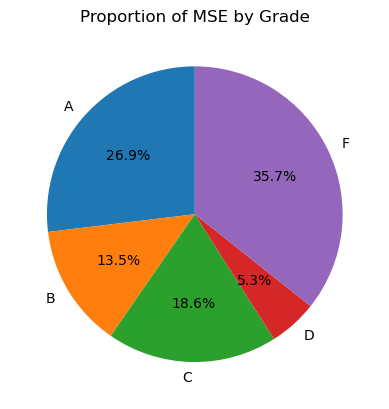

In [34]:
#Pie Chart depicting MSE prop by Grade
data = np.array([prop_A, prop_B, prop_C, prop_D, prop_F])
label = ['A', 'B', 'C', 'D', 'F']
 
plt.pie(data, labels=label, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of MSE by Grade')
#plt.axis('equal')
plt.show()

In [35]:
#Creating dict to hold total mass shootings per state
total_incidents = {'Illinois': 57, 'California': 50, 'Texas': 50, 'Pennsylvania': 34, 'Florida': 31, 'New York': 31,
                   'Georgia': 29, 'Louisiana': 28, 'Michigan': 25, 'North Carolina': 21, 'Virginia': 20, 'South Carolina': 20,
                   'Ohio': 19, 'Maryland': 19, 'Tennessee': 17, 'Alabama': 16, 'Wisconsin': 16, 'Indiana': 15, 'Mississippi': 14,
                   'Missouri': 14, 'Colorado': 13, 'Arizona': 13, 'Minnesota': 12, 'Washington': 11, 'New Jersey': 9,
                   'Kentucky': 9, 'Oklahoma': 8, 'Oregon': 6, 'Nebraska': 5, 'Nevada': 5, 'Arkansas': 5, 'New Mexico': 4,
                   'Massachusetts': 3, 'Connecticut': 3, 'Kansas': 3, 'Delaware': 2, 'Iowa': 2}




In [36]:
#Mapping total mass shootings per state into new column
mass_copy['total_incidents'] = mass_copy['State'].map(total_incidents)


In [37]:
#Verify column added
mass_copy.head()

,Incident ID,Incident Date,State,City Or County,Killed,Injured,month,Grade,total_incidents
0,2491656,2022-12-31,Arizona,Phoenix,0,9,12,F,13
1,2492253,2022-12-31,Alabama,Mobile,1,8,12,F,16
2,2491054,2022-12-30,Tennessee,Memphis,1,3,12,F,17
3,2490925,2022-12-30,Texas,Humble,2,3,12,F,50
4,2489614,2022-12-28,New York,Bronx,1,3,12,A,31


In [38]:
#Recheck df
mass_copy.shape

(639, 9)

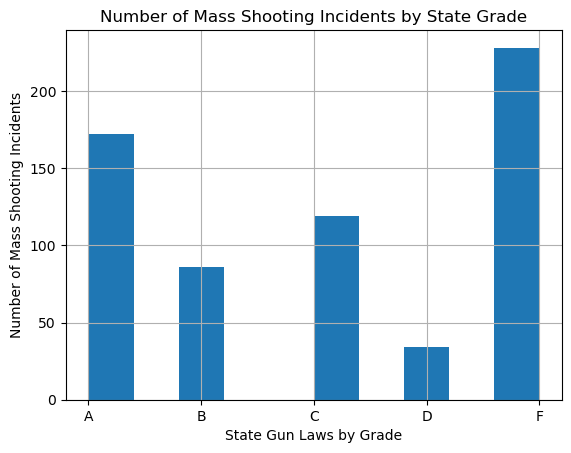

In [39]:
#Plot MSE by State Grade
mass_copy['Grade'].sort_values().hist()
plt.title('Number of Mass Shooting Incidents by State Grade')
plt.xlabel('State Gun Laws by Grade')
plt.ylabel('Number of Mass Shooting Incidents');

In [40]:
#Creating dict of total killed by state
total_killed = {'Texas': 90, 'California': 62, 'Illinois': 51, 'Virginia': 37, 'Georgia': 32, 'Maryland': 31, 'Colorado': 23,
                'Florida': 23, 'New York': 23, 'Pennsylvania': 23, 'Oklahoma': 23, 'Wisconsin': 20, 'Michigan': 19,
                'Indiana': 19, 'Ohio': 19, 'North Carolina': 17, 'Arizona': 16, 'Mississippi': 16, 'South Carolina': 15,
                'Louisiana': 14, 'Tennessee': 14, 'Missouri': 14, 'Alabama': 11, 'Minnesota': 11, 'Arkansas': 8, 
                'Kentucky': 7, 'Nebraska': 6, 'Oregon': 6, 'Washington': 4, 'New Jersey': 3, 'Kansas': 3, 'Iowa': 3,
                'New Mexico': 2, 'Nevada': 2, 'Connecticut': 1, 'Massachusetts': 0, 'Delaware': 0}

In [41]:
#Mapping total killed per state into new column
mass_copy['total_killed'] = mass_copy['State'].map(total_killed)
mass_copy.head()

,Incident ID,Incident Date,State,City Or County,Killed,Injured,month,Grade,total_incidents,total_killed
0,2491656,2022-12-31,Arizona,Phoenix,0,9,12,F,13,16
1,2492253,2022-12-31,Alabama,Mobile,1,8,12,F,16,11
2,2491054,2022-12-30,Tennessee,Memphis,1,3,12,F,17,14
3,2490925,2022-12-30,Texas,Humble,2,3,12,F,50,90
4,2489614,2022-12-28,New York,Bronx,1,3,12,A,31,23


<AxesSubplot:>

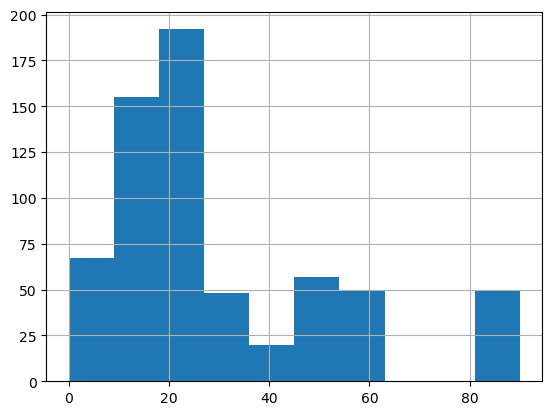

In [42]:
#Viewing total killed
mass_copy['total_killed'].hist()

In [43]:
# Sum number of mass shooting incidents by state
max_state_incidents = mass_copy.groupby('State')['Incident ID'].count().sort_values(ascending=False)
max_state_incidents

State
Illinois          57
California        50
Texas             50
Pennsylvania      34
Florida           31
New York          31
Georgia           29
Louisiana         28
Michigan          25
North Carolina    21
Virginia          20
South Carolina    20
Ohio              19
Maryland          19
Tennessee         17
Alabama           16
Wisconsin         16
Indiana           15
Mississippi       14
Missouri          14
Colorado          13
Arizona           13
Minnesota         12
Washington        11
New Jersey         9
Kentucky           9
Oklahoma           8
Oregon             6
Nebraska           5
Nevada             5
Arkansas           5
New Mexico         4
Massachusetts      3
Connecticut        3
Kansas             3
Delaware           2
Iowa               2
Name: Incident ID, dtype: int64

<AxesSubplot:>

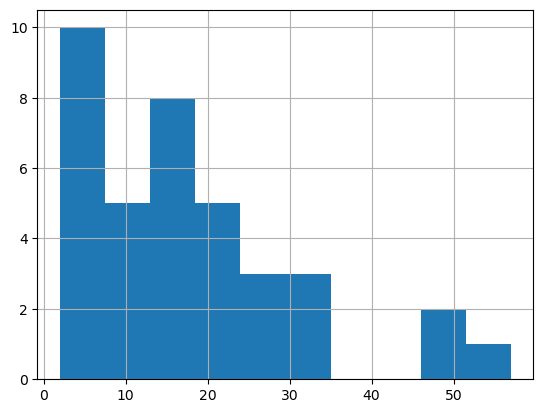

In [44]:
max_state_incidents.hist()

In [45]:
#Number killed by state
state_killed = mass_copy.groupby('State')['Killed'].sum().sort_values(ascending=False)
state_killed

State
Texas             90
California        62
Illinois          51
Virginia          37
Georgia           32
Maryland          31
Colorado          23
Florida           23
New York          23
Pennsylvania      23
Oklahoma          23
Wisconsin         20
Michigan          19
Indiana           19
Ohio              19
North Carolina    17
Arizona           16
Mississippi       16
South Carolina    15
Louisiana         14
Tennessee         14
Missouri          14
Alabama           11
Minnesota         11
Arkansas           8
Kentucky           7
Nebraska           6
Oregon             6
Washington         4
New Jersey         3
Kansas             3
Iowa               3
New Mexico         2
Nevada             2
Connecticut        1
Massachusetts      0
Delaware           0
Name: Killed, dtype: int64

<AxesSubplot:>

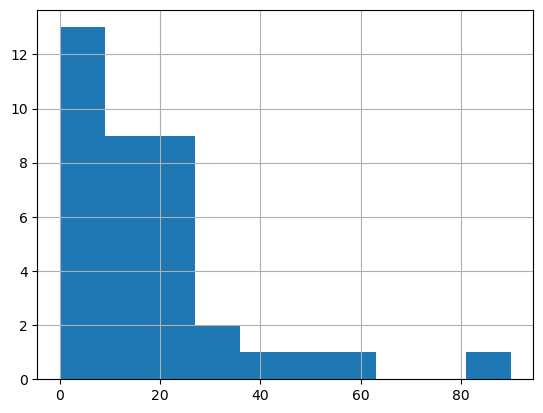

In [46]:
state_killed.hist()

In [47]:
#Total number injured per state in 2022
state_injured = mass_copy.groupby(['State','Grade'])['Injured'].sum().sort_values(ascending=False)
state_injured

State           Grade
Illinois        A        254
Texas           F        200
California      A        192
Pennsylvania    B        146
Louisiana       F        138
Florida         C        129
New York        A        129
Georgia         F        109
Michigan        C        100
South Carolina  F         93
North Carolina  C         88
Ohio            D         76
Virginia        B         75
Tennessee       F         72
Alabama         F         69
Wisconsin       C         68
Arizona         F         67
Missouri        F         60
Indiana         D         58
Colorado        B         57
Mississippi     F         57
Maryland        A         53
Washington      B         49
Minnesota       C         43
New Jersey      A         40
Kentucky        F         39
Nevada          C         36
Arkansas        F         36
Oregon          B         24
Oklahoma        F         19
Nebraska        C         18
New Mexico      C         17
Massachusetts   A         14
Iowa            F    

In [48]:
#Creating dict to add to df
total_injured = {'Illinois': 254, 'Texas': 200, 'California': 192, 'Pennsylvania': 146, 'Louisiana': 138, 'Florida': 129,
                 'New York': 129, 'Georgia': 109, 'Michigan': 100, 'South Carolina': 93, 'North Carolina': 88, 'Ohio': 76,
                 'Virginia': 75, 'Tennessee': 72, 'Alabama': 69, 'Wisconsin': 68, 'Arizona': 67, 'Missouri': 60, 'Indiana': 58,
                 'Colorado': 57, 'Mississippi': 57, 'Maryland': 53, 'Washington': 49, 'Minnesota': 43, 'New Jersey': 40,
                 'Kentucky': 39, 'Nevada': 36, 'Arkansas': 36, 'Oregon': 24, 'Oklahoma': 19, 'Nebraska': 18, 'New Mexico': 17,
                 'Massachusetts': 14, 'Iowa': 13, 'Kansas': 12, 'Connecticut': 11, 'Delaware': 8}

In [49]:
#Mapping total killed per state into new column
mass_copy['total_injured'] = mass_copy['State'].map(total_injured)
mass_copy.head()

,Incident ID,Incident Date,State,City Or County,Killed,Injured,month,Grade,total_incidents,total_killed,total_injured
0,2491656,2022-12-31,Arizona,Phoenix,0,9,12,F,13,16,67
1,2492253,2022-12-31,Alabama,Mobile,1,8,12,F,16,11,69
2,2491054,2022-12-30,Tennessee,Memphis,1,3,12,F,17,14,72
3,2490925,2022-12-30,Texas,Humble,2,3,12,F,50,90,200
4,2489614,2022-12-28,New York,Bronx,1,3,12,A,31,23,129


<AxesSubplot:>

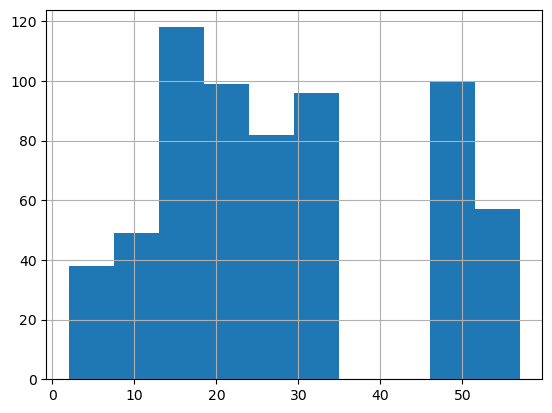

In [50]:
mass_copy['total_incidents'].hist()

In [51]:
#Create dict to hold state gun law values
#Use to SPLIT df into Strict V Weak
grade_dict = {'A' :['California', 'New Jersey', 'Connecticut', 'Hawaii', 'Illinois', 'Maryland', 'Massachusetts', 'New York'],
'B' : ['Colorado', 'Delaware', 'Rhode Island', 'Virginia', 'Washington', 'Oregon', 'Pennsylvania'],
'C+': ['Michigan', 'Nevada', 'Minnesota'],
'C': ['New Mexico'],
'C-': ['Florida', 'Nebraska', 'North Carolina', 'Vermont', 'Wisconsin'],
'D': ['Ohio', 'Indiana'],
'F': ['Alabama', 'Alaska', 'Arkansas', 'Arizona', 'Georgia', 'Idaho', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 
     'Mississippi', 'Missouri', 'Montana', 'New Hampshire', 'North Dakota', 'Oklahoma', 'South Carolina', 'South Dakota', 
     'Tennessee', 'Texas', 'Utah', 'West Virginia', 'Wyoming']}

In [52]:
#Create copy for analysis
state_totals_df = mass_copy[['State', 'total_incidents', 'total_killed', 'total_injured']].copy()
state_mse = mass_copy[['State', 'Grade', 'total_incidents', 'total_killed', 'total_injured']].copy()

In [53]:
#Recalling function to split 'C' group
d = flatten_dict(grade_dict)

In [54]:
#Adding new column with dict values
state_totals_df['Grade'] = state_totals_df['State'].map(d)
state_totals_df


,State,total_incidents,total_killed,total_injured,Grade
0,Arizona,13,16,67,F
1,Alabama,16,11,69,F
2,Tennessee,17,14,72,F
3,Texas,50,90,200,F
4,New York,31,23,129,A
...,...,...,...,...,...
643,Wisconsin,16,20,68,C-
644,Illinois,57,51,254,A
645,South Carolina,20,15,93,F
646,Indiana,15,19,58,D


In [55]:
#Dropping duplicates to see how many states are in each Grade
state_totals_df.drop_duplicates(keep='first', inplace=True)
state_mse.drop_duplicates(keep='first', inplace=True)

In [56]:
#DF with duplicates removed
state_totals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 518
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            37 non-null     object
 1   total_incidents  37 non-null     int64 
 2   total_killed     37 non-null     int64 
 3   total_injured    37 non-null     int64 
 4   Grade            37 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.7+ KB


In [57]:
#Total number of MSE by Grade
mass_copy.Grade.value_counts()

F    228
A    172
C    119
B     86
D     34
Name: Grade, dtype: int64

In [58]:
#Total states with MSE by Grade
state_totals_df.Grade.value_counts()

F     14
A      7
B      6
C-     4
C+     3
D      2
C      1
Name: Grade, dtype: int64

In [59]:
#Viewing totals by Grade
state_totals_df.query('Grade == "F"')

,State,total_incidents,total_killed,total_injured,Grade
0,Arizona,13,16,67,F
1,Alabama,16,11,69,F
2,Tennessee,17,14,72,F
3,Texas,50,90,200,F
9,Louisiana,28,14,138,F
10,Mississippi,14,16,57,F
11,Kansas,3,3,12,F
14,Oklahoma,8,23,19,F
15,Georgia,29,32,109,F
81,South Carolina,20,15,93,F


In [60]:
#Viewing df
state_mse.head()

,State,Grade,total_incidents,total_killed,total_injured
0,Arizona,F,13,16,67
1,Alabama,F,16,11,69
2,Tennessee,F,17,14,72
3,Texas,F,50,90,200
4,New York,A,31,23,129


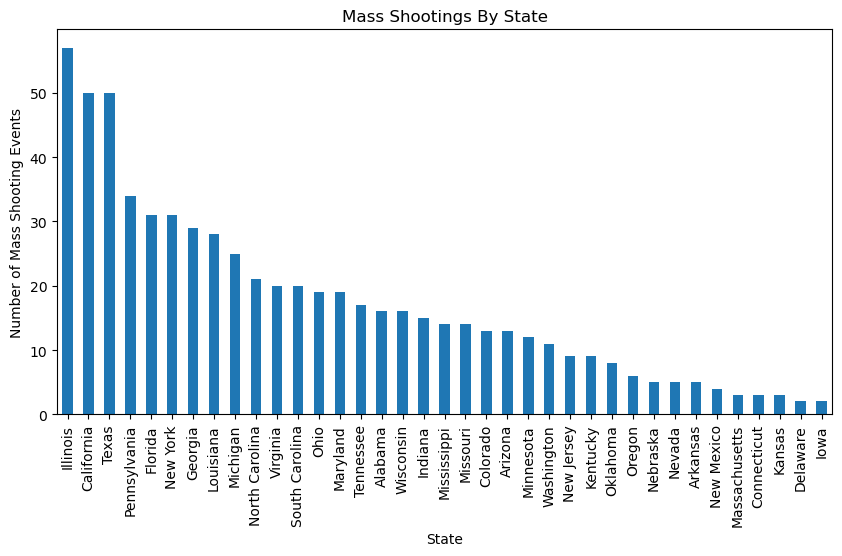

In [61]:
#Plotting MSE totals by State
state_mse.groupby('State')['total_incidents'].max().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.xlabel('State')
plt.ylabel('Number of Mass Shooting Events')
plt.title('Mass Shootings By State');

In [62]:
#Function to determine state MSE totals by Grade
def grade_mse(object):
    grade = state_mse[state_mse['Grade'] == object]
    grade_mse = grade.groupby('State')['total_incidents'].max().sort_values(ascending=False)
    return grade_mse

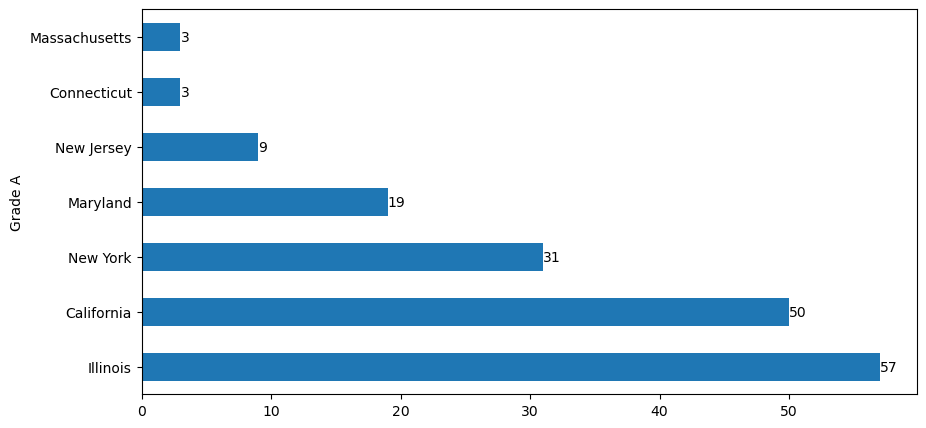

In [63]:
#Plotting MSE Grade A
df = grade_mse('A')
ax = df.plot.barh(figsize=(10, 5))
#fig = plt.figure(figsize=(10, 5))
ax.bar_label(ax.containers[0])

plt.ylabel('Grade A');

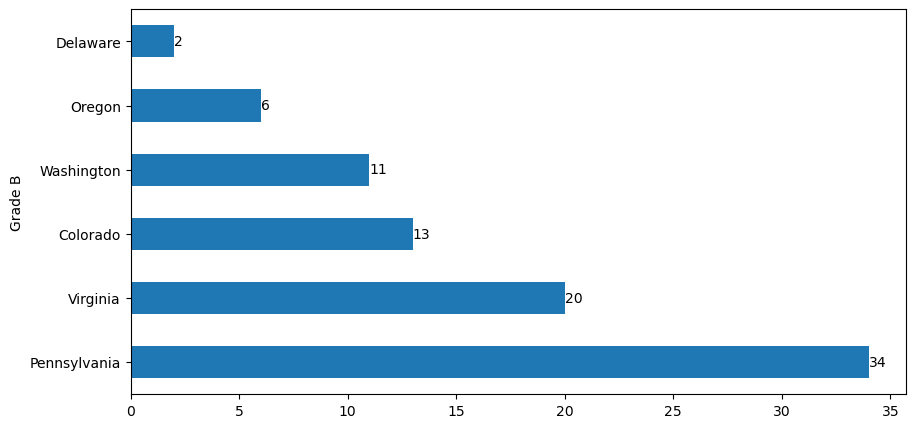

In [64]:
#Plotting MSE Grade B
df = grade_mse('B')
ax = df.plot.barh(figsize=(10, 5))

ax.bar_label(ax.containers[0])
plt.ylabel('Grade B');

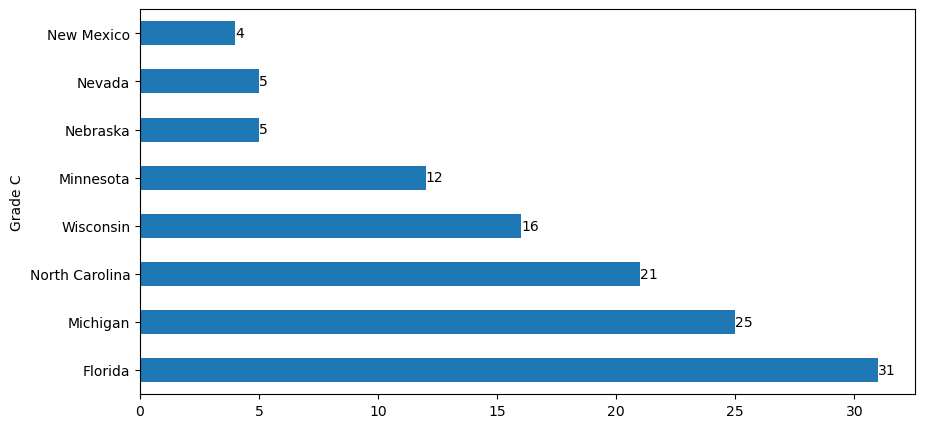

In [65]:
#Plotting MSE Grade C
df = grade_mse('C')
ax = df.plot.barh(figsize=(10, 5))

ax.bar_label(ax.containers[0])
plt.ylabel('Grade C');

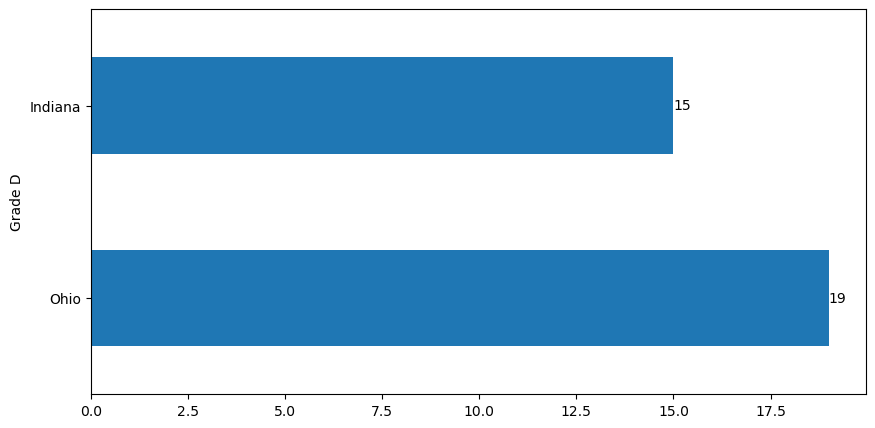

In [66]:
#Plotting MSE Grade D
df = grade_mse('D')
ax = df.plot.barh(figsize=(10, 5))

ax.bar_label(ax.containers[0])
plt.ylabel('Grade D');

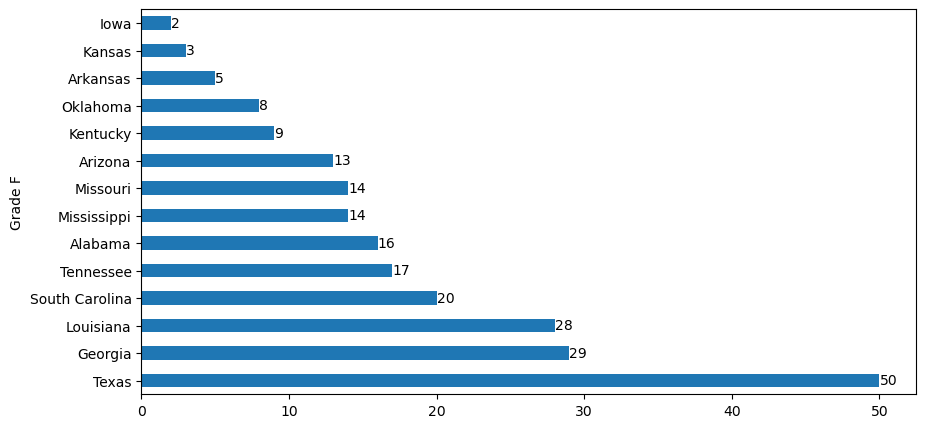

In [67]:
#Plotting MSE Grade F
df = grade_mse('F')
ax = df.plot.barh(figsize=(10, 5), width=0.5)

ax.bar_label(ax.containers[0])
plt.ylabel('Grade F');

In [68]:
#Function to determine state total injured by Grade
def grade_mse(object):
    grade = state_mse[state_mse['Grade'] == object]
    grade_mse = grade.groupby('State')['total_injured'].max().sort_values(ascending=False)
    return grade_mse

In [69]:
grade_mse('A')

State
Illinois         254
California       192
New York         129
Maryland          53
New Jersey        40
Massachusetts     14
Connecticut       11
Name: total_injured, dtype: int64

In [70]:
grade_mse('B')

State
Pennsylvania    146
Virginia         75
Colorado         57
Washington       49
Oregon           24
Delaware          8
Name: total_injured, dtype: int64

In [71]:
grade_mse('C')

State
Florida           129
Michigan          100
North Carolina     88
Wisconsin          68
Minnesota          43
Nevada             36
Nebraska           18
New Mexico         17
Name: total_injured, dtype: int64

In [72]:
grade_mse('D')

State
Ohio       76
Indiana    58
Name: total_injured, dtype: int64

In [73]:
grade_mse('F')

State
Texas             200
Louisiana         138
Georgia           109
South Carolina     93
Tennessee          72
Alabama            69
Arizona            67
Missouri           60
Mississippi        57
Kentucky           39
Arkansas           36
Oklahoma           19
Iowa               13
Kansas             12
Name: total_injured, dtype: int64

### Performing Data Analysis

- Perform ANOVA on 5 groups
- Split dataset into 2 groups
- Perform T-test

In [74]:
#Make copies of df to test on
t_test_df = state_totals_df.copy()
anova_test_df = mass_copy.copy()

In [75]:
anova_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 0 to 647
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Incident ID      639 non-null    int64         
 1   Incident Date    639 non-null    datetime64[ns]
 2   State            639 non-null    object        
 3   City Or County   639 non-null    object        
 4   Killed           639 non-null    int64         
 5   Injured          639 non-null    int64         
 6   month            639 non-null    int64         
 7   Grade            639 non-null    object        
 8   total_incidents  639 non-null    int64         
 9   total_killed     639 non-null    int64         
 10  total_injured    639 non-null    int64         
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 59.9+ KB


In [76]:
#Viewing DF for anova
anova_test_df.head()

,Incident ID,Incident Date,State,City Or County,Killed,Injured,month,Grade,total_incidents,total_killed,total_injured
0,2491656,2022-12-31,Arizona,Phoenix,0,9,12,F,13,16,67
1,2492253,2022-12-31,Alabama,Mobile,1,8,12,F,16,11,69
2,2491054,2022-12-30,Tennessee,Memphis,1,3,12,F,17,14,72
3,2490925,2022-12-30,Texas,Humble,2,3,12,F,50,90,200
4,2489614,2022-12-28,New York,Bronx,1,3,12,A,31,23,129


In [77]:
#Drop columns not needed for anova test
drop_col = ["Incident ID", "Incident Date", 'City Or County', 'Killed', 'Injured', 'month']

anova_test_df.drop(columns=drop_col, axis=1, inplace=True)


In [78]:
#Drop duplicates for anova test
anova_test_df.drop_duplicates(keep='first', inplace=True)

In [79]:
anova_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 518
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            37 non-null     object
 1   Grade            37 non-null     object
 2   total_incidents  37 non-null     int64 
 3   total_killed     37 non-null     int64 
 4   total_injured    37 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.7+ KB


In [80]:
#Viewing df for anova test
anova_test_df.head()

,State,Grade,total_incidents,total_killed,total_injured
0,Arizona,F,13,16,67
1,Alabama,F,16,11,69
2,Tennessee,F,17,14,72
3,Texas,F,50,90,200
4,New York,A,31,23,129


In [81]:
t_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 518
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            37 non-null     object
 1   total_incidents  37 non-null     int64 
 2   total_killed     37 non-null     int64 
 3   total_injured    37 non-null     int64 
 4   Grade            37 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.7+ KB


In [82]:
#Verifying df has varied 'C' grade to split later
t_test_df.sample(10)

,State,total_incidents,total_killed,total_injured,Grade
159,Nevada,5,2,36,C+
40,Maryland,19,31,53,A
11,Kansas,3,3,12,F
3,Texas,50,90,200,F
518,Iowa,2,3,13,F
57,New Jersey,9,3,40,A
81,South Carolina,20,15,93,F
93,Wisconsin,16,20,68,C-
12,Florida,31,23,129,C-
89,Missouri,14,14,60,F


<a id='ab_test'></a>
## ANOVA Test

For the ANOVA Test to determine if there is a difference in the incidents of mass shootings for states with strict gun laws and states with weak gun laws, two hypotheses must be determined. The Null Hypothesis for this project will assume there is no difference in mass shooting events between states with strict gun laws and states with weak gun laws. For our alternative hypothesis, we are trying to disprove the null hypothesis. Therefore, the alternative hypothesis for this project assumes there is a difference in the incidence of mass shooting events between states with strict gun laws and states with weak gun laws.

In [83]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

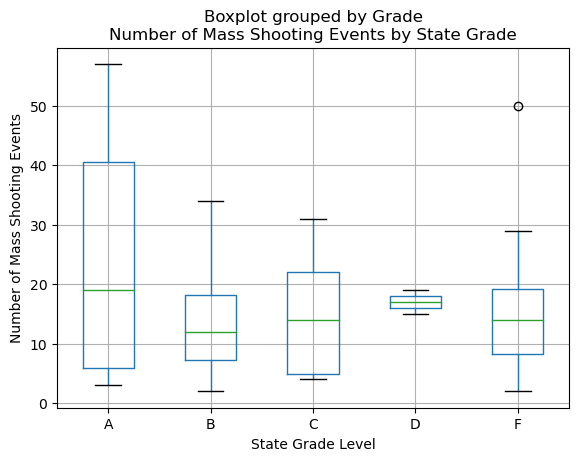

In [121]:
#State Totals Anova test Boxplot to view groups
anova_test_df.boxplot('total_incidents', by="Grade")
plt.title('Number of Mass Shooting Events by State Grade')
plt.xlabel('State Grade Level')
plt.ylabel('Number of Mass Shooting Events');

After viewing the boxplot of the 5 groups, significant variance is noted between the sample groups. This suggests the ANOVA may not be the best fit for this project. I am still going to run the ANOVA test for educational purposes

In [103]:
#pip install pingouin

In [122]:
#Running ANOVA using pingouin
import pingouin as pg

aov = pg.anova(data=anova_test_df, dv='total_incidents', between='Grade', detailed=True)
print(aov)

   Source           SS  DF          MS         F     p-unc       np2
0   Grade   484.517535   4  121.129384  0.602936  0.663295  0.070085
1  Within  6428.779762  32  200.899368       NaN       NaN       NaN


In [86]:
#ANOVA test is not significant but still running post-hoc for educational purposes
#Pairwise comparison using Tukey

pt = pg.pairwise_tukey(dv='total_incidents', between='Grade', data=anova_test_df)
print(pt)

   A  B    mean(A)    mean(B)       diff         se         T   p-tukey  \
0  A  B  24.571429  14.333333  10.238095   7.885629  1.298323  0.694096   
1  A  C  24.571429  14.875000   9.696429   7.335689  1.321816  0.679966   
2  A  D  24.571429  17.000000   7.571429  11.364400  0.666241  0.962209   
3  A  F  24.571429  16.285714   8.285714   6.561240  1.262828  0.715146   
4  B  C  14.333333  14.875000  -0.541667   7.654779 -0.070762  0.999994   
5  B  D  14.333333  17.000000  -2.666667  11.572939 -0.230423  0.999340   
6  B  F  14.333333  16.285714  -1.952381   6.916154 -0.282293  0.998534   
7  C  D  14.875000  17.000000  -2.125000  11.205450 -0.189640  0.999694   
8  C  F  14.875000  16.285714  -1.410714   6.281909 -0.224568  0.999404   
9  D  F  17.000000  16.285714   0.714286  10.714459  0.066666  0.999995   

     hedges  
0  0.526664  
1  0.543405  
2  0.327746  
3  0.488164  
4 -0.047352  
5 -0.220870  
6 -0.151166  
7 -0.200807  
8 -0.114216  
9  0.055024  


In [123]:
# Another way to run ANOVA, verifying results
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(anova_test_df['total_incidents'][anova_test_df['Grade'] == 'A'],
               anova_test_df['total_incidents'][anova_test_df['Grade'] == 'B'],
               anova_test_df['total_incidents'][anova_test_df['Grade'] == 'C'],
               anova_test_df['total_incidents'][anova_test_df['Grade'] == 'D'],
               anova_test_df['total_incidents'][anova_test_df['Grade'] == 'F'])
print(fvalue, pvalue)

0.6029356155750204 0.6632953855019299


#### ANOVA Results

Based on the above One-Way ANOVA analysis, there is no siginficant difference amoung the state law groups (F-value = 0.60, p-value = 0.66). The p-value of 0.66 is greater than the alpha of 0.05, so we Fail to Reject the null hypothesis and accept there is no statistically significant difference among the state gun law groups and incidence of mass shootings. 

#### Kruskal-Wallis
Because there is variance among the groups and the sample sizes are considerably different, Kruskal-Wallis Test will be performed. Kruskal-Wallis is a non-parametric version of ANOVA testing that compares median scores of each group to determine if there is a significant difference among the median values.

In [124]:
from scipy import stats

#Creating groups
groupA = np.array(anova_test_df.query('Grade == "A"')['total_incidents'])
groupB = np.array(anova_test_df.query('Grade == "B"')['total_incidents'])
groupC = np.array(anova_test_df.query('Grade == "C"')['total_incidents'])
groupD = np.array(anova_test_df.query('Grade == "D"')['total_incidents'])
groupF = np.array(anova_test_df.query('Grade == "F"')['total_incidents'])



In [125]:
#perform Kruskal-Wallis Test 
stats.kruskal(groupA, groupB, groupC, groupD, groupF)

KruskalResult(statistic=0.7784433169870939, pvalue=0.9413144531368169)

#### Kruskal-Wallis Results

Following Kruskal-Wallis analysis, the p-value of 0.94 is greater than alpha of 0.05, indicating there is no significant difference among the median values of all state gun law groups.

### Two Sample T-Test

Because our sample sizes are fairly small and not distributed evenly, we will now divide the dataset into two groups. The Strict Gun Laws group will include those states with ratings from 'A+' to 'C'. Weak Gun Laws group will include those states with ratings from 'C-' to 'F-'. Total number of states within the Strict Group is 17, while total number of states within the Weak Group is 20. Total number of mass shooting incidents in the Strict Group = 304 while total number of mass shooting incidents in the Weak Group = 335.

In [90]:
#Splitting df into 2 groups
#Strict group
strict_states = t_test_df.query('Grade == ["A","B","C+","C"]').copy()
strict_states

,State,total_incidents,total_killed,total_injured,Grade
4,New York,31,23,129,A
8,California,50,62,192,A
16,Illinois,57,51,254,A
25,Michigan,25,19,100,C+
40,Maryland,19,31,53,A
41,Pennsylvania,34,23,146,B
42,Virginia,20,37,75,B
46,Colorado,13,23,57,B
57,New Jersey,9,3,40,A
109,Massachusetts,3,0,14,A


In [91]:
#Splitting DF into 2 groups
#Weak group
weak_states = t_test_df.query('Grade == ["C-","D","F"]').copy()
weak_states

,State,total_incidents,total_killed,total_injured,Grade
0,Arizona,13,16,67,F
1,Alabama,16,11,69,F
2,Tennessee,17,14,72,F
3,Texas,50,90,200,F
7,Ohio,19,19,76,D
9,Louisiana,28,14,138,F
10,Mississippi,14,16,57,F
11,Kansas,3,3,12,F
12,Florida,31,23,129,C-
14,Oklahoma,8,23,19,F


In [126]:
#Viewing 2 groups
strict_states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 4 to 267
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            17 non-null     object
 1   total_incidents  17 non-null     int64 
 2   total_killed     17 non-null     int64 
 3   total_injured    17 non-null     int64 
 4   Grade            17 non-null     object
dtypes: int64(3), object(2)
memory usage: 816.0+ bytes


In [127]:
#Viewing 2 groups
weak_states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 518
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            20 non-null     object
 1   total_incidents  20 non-null     int64 
 2   total_killed     20 non-null     int64 
 3   total_injured    20 non-null     int64 
 4   Grade            20 non-null     object
dtypes: int64(3), object(2)
memory usage: 960.0+ bytes


In [128]:
#Viewing mean of strict group
strict_states.total_incidents.mean()

17.88235294117647

In [129]:
#Viewing mean of weak group
weak_states.total_incidents.mean()

16.75

array([[<AxesSubplot:title={'center':'total_incidents'}>,
        <AxesSubplot:title={'center':'total_killed'}>],
       [<AxesSubplot:title={'center':'total_injured'}>, <AxesSubplot:>]],
      dtype=object)

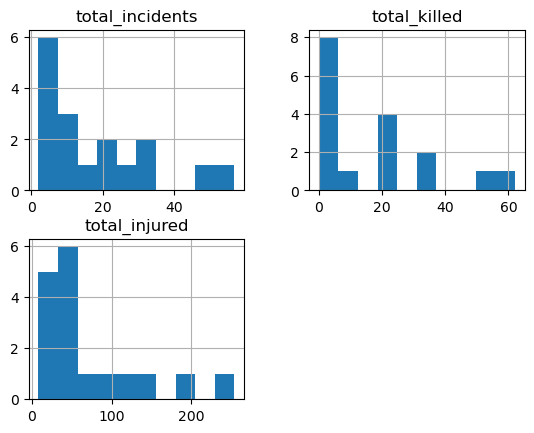

In [96]:
#Viewing strict group hist
strict_states.hist()

array([[<AxesSubplot:title={'center':'total_incidents'}>,
        <AxesSubplot:title={'center':'total_killed'}>],
       [<AxesSubplot:title={'center':'total_injured'}>, <AxesSubplot:>]],
      dtype=object)

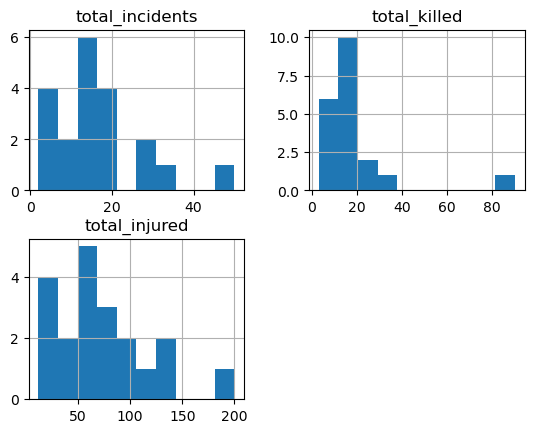

In [97]:
#Viewing weak group hist
weak_states.hist()

In [130]:
# Python program to display variance of data groups

#creating data groups
data_group1 = np.array(strict_states['total_incidents'])
data_group2 = np.array(weak_states['total_incidents'])
 
# Print the variance of both data groups
print(np.var(data_group1))
print(np.var(data_group2))

260.57439446366783
123.5875


In [131]:
#Checking assumption of normal distribution
sampling_difference = data_group2 - data_group2
                      
stats.shapiro(sampling_difference)

C:\Users\andra\anaconda3\lib\site-packages\scipy\stats\morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


ShapiroResult(statistic=1.0, pvalue=1.0)

There is no significant difference between the two groups, indicating they are normally distributed

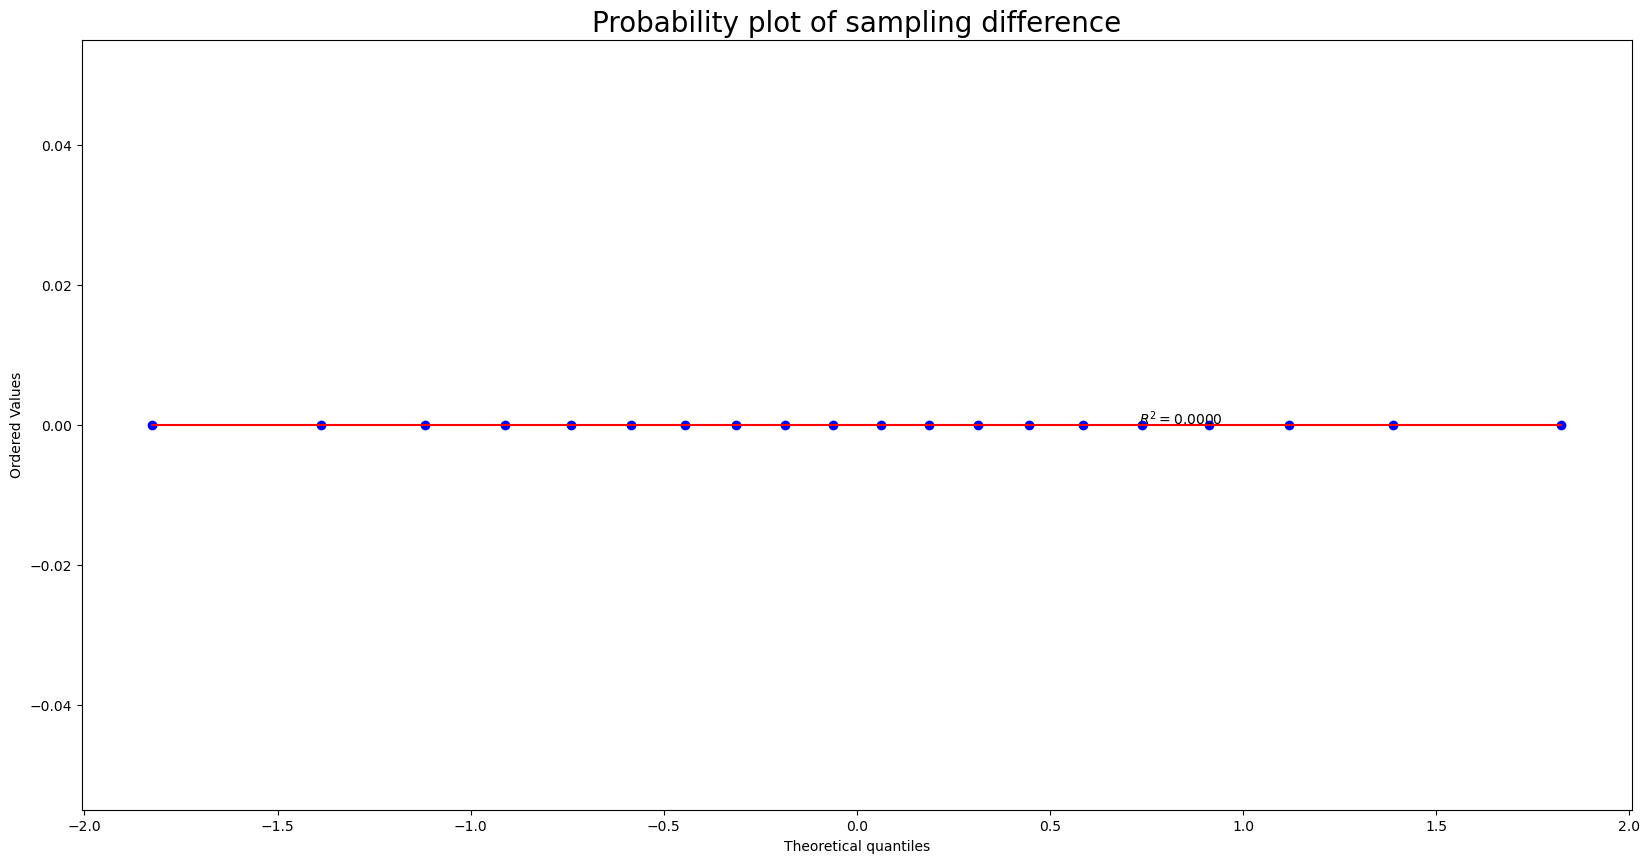

In [132]:
#Plotting assumption of normal distribution
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(sampling_difference, plot= plt, rvalue= True)
ax.set_title("Probability plot of sampling difference", fontsize= 20)
ax.set

plt.show()

In [133]:
#Checking assumption Homogeneity of Variance
stats.levene(strict_states['total_incidents'],
             weak_states['total_incidents'],
             center= 'mean')

LeveneResult(statistic=2.905229290550243, pvalue=0.0971560258737737)

There is no significant difference among the groups, so the assumption of Homogeneity of Variance is confirmed

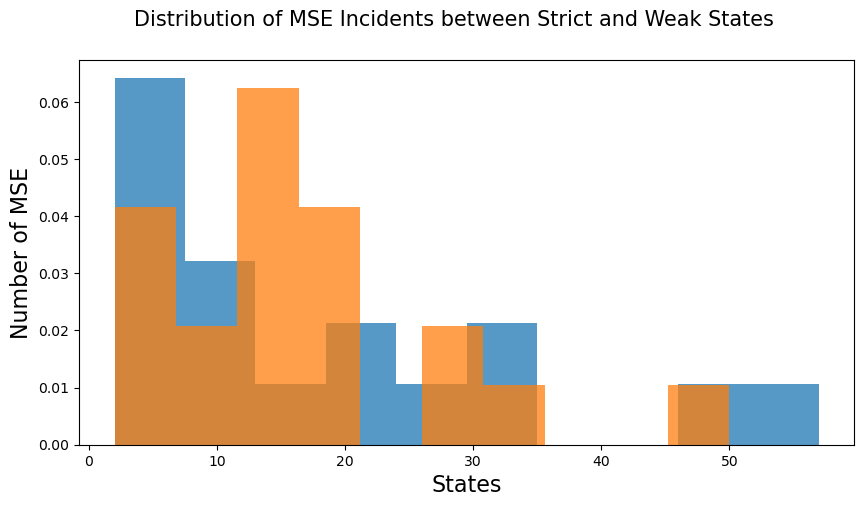

In [134]:
#Plot visualizing distributions of both samples
fig = plt.figure(figsize= (10, 5))
ax = fig.add_subplot(111)


strict = plt.hist(strict_states['total_incidents'], label= "Strict",
                     density= True,
                     alpha=0.75)
weak = plt.hist(weak_states['total_incidents'], label= "Weak",
                       density= True,
                       alpha=0.75)


plt.suptitle("Distribution of MSE Incidents between Strict and Weak States", fontsize= 15)
plt.xlabel("States", fontsize= 16)
plt.ylabel("Number of MSE", fontsize= 16)

plt.show()

In [135]:
#Running T-test with researchpy
import researchpy as rp
summary, results = rp.ttest(group1=strict_states['total_incidents'],group2=weak_states['total_incidents'])
print(summary)

          Variable     N       Mean         SD        SE  95% Conf.   Interval
0  total_incidents  17.0  17.882353  16.639119  4.035579   9.327307  26.437399
1  total_incidents  20.0  16.750000  11.405793  2.550413  11.411925  22.088075
2         combined  37.0  17.270270  13.857707  2.278193  12.649881  21.890660


C:\Users\andra\anaconda3\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


In [136]:
print(results)

                                  Independent t-test  results
0  Difference (total_incidents - total_incidents) =    1.1324
1                              Degrees of freedom =   35.0000
2                                               t =    0.2444
3                           Two side test p value =    0.8083
4                          Difference < 0 p value =    0.5958
5                          Difference > 0 p value =    0.4042
6                                       Cohen's d =    0.0806
7                                       Hedge's g =    0.0789
8                                  Glass's delta1 =    0.0681
9                                Point-Biserial r =    0.0413


In [137]:
# Perform the two sample t-test with equal variances
# Running t-test with scipy stats
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=0.24444559879560487, pvalue=0.8083131342742044)

In [110]:
# Python program to conduct two-sample
# T-test using pingouin library
 
# Importing library
from statsmodels.stats.weightstats import ttest_ind

 
# Conducting two-sample ttest
result = pg.ttest(data_group1,
                  data_group2,
                  correction=True)
 
# Print the result
print(result)

               T        dof alternative     p-val           CI95%   cohen-d  \
T-test  0.237195  27.622537   two-sided  0.814256  [-8.65, 10.92]  0.080639   

         BF10     power  
T-test  0.326  0.056504  


Following dividing the dataset into two groups, a two sample T-Test was conducted. Sample means of each group are similar (strict = 17.88), (weak = 16.75). All T-test assumptions were evaluated and confirmed. The observed T-Test value was 0.244 with a p-value of 0.81. This p-value is greater than the alpha of 0.05 which suggests we Fail to Reject the Null hypothesis, indicating there is no significant difference among the two groups.

In [111]:
rp.summary_cont(anova_test_df['total_incidents'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_incidents,37.0,17.2703,13.8577,2.2782,12.6499,21.8907


In [112]:
rp.summary_cont(anova_test_df['total_incidents'].groupby(anova_test_df['Grade']))

,N,Mean,SD,SE,95% Conf.,Interval
Grade,,,,,,
A,7,24.5714,22.1499,8.3719,4.0862,45.0567
B,6,14.3333,11.4310,4.6667,2.3373,26.3294
C,8,14.8750,10.1621,3.5928,6.3793,23.3707
D,2,17.0000,2.8284,2.0000,-8.4124,42.4124
F,14,16.2857,12.7124,3.3975,8.9458,23.6256


In [113]:
rp.summary_cont(t_test_df['total_incidents'].groupby(t_test_df['Grade']))

,N,Mean,SD,SE,95% Conf.,Interval
Grade,,,,,,
A,7,24.5714,22.1499,8.3719,4.0862,45.0567
B,6,14.3333,11.4310,4.6667,2.3373,26.3294
C,1,4.0000,NaN,NaN,NaN,NaN
C+,3,14.0000,10.1489,5.8595,-11.2112,39.2112
C-,4,18.2500,10.8128,5.4064,1.0444,35.4556
D,2,17.0000,2.8284,2.0000,-8.4124,42.4124
F,14,16.2857,12.7124,3.3975,8.9458,23.6256
